In [9]:
#!pip install seaborn

In [11]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
df = pd.read_csv('benchmark.csv')
df.head()

,InstanceInst.,StatusStat.,VariablesVari.,BinariesBina.,IntegersInte.,ContinuousCont.,ConstraintsCons.,Nonz.Nonz.,SubmitterSubm.,GroupGrou.,ObjectiveObje.,TagsTags.
0,30n20b8,easy,18380,18318,62,0,576,109706,"E. Coughlan, M. Lübbecke, J. Schulz",–,302,benchmark benchmark_suitable precedence set_pa...
1,50v-10,easy,2013,1464,183,366,233,2745,Serge Bisaillon,–,3311.1799841,benchmark decomposition benchmark_suitable mix...
2,academictimetablesmall,easy,28926,28926,0,0,23294,268350,Joshua Friedman,–,0,benchmark binary decomposition benchmark_suita...
3,air05,easy,7195,7195,0,0,426,52121,G. Astfalk,air,26374,benchmark binary benchmark_suitable set_partit...
4,app1-1,easy,2480,1225,0,1255,4926,18275,Emilie Danna,app,-3,benchmark benchmark_suitable precedence variab...


In [5]:
df.value_counts('StatusStat.')

StatusStat.
easy    220
hard     19
open      1
Name: count, dtype: int64

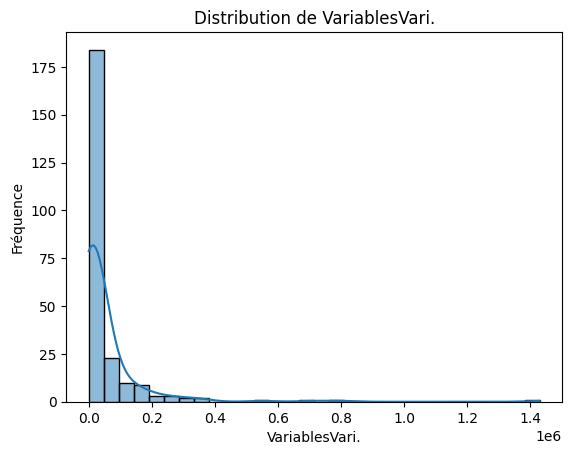

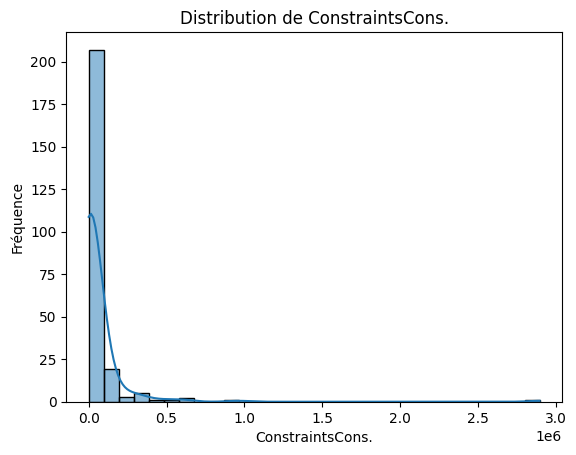

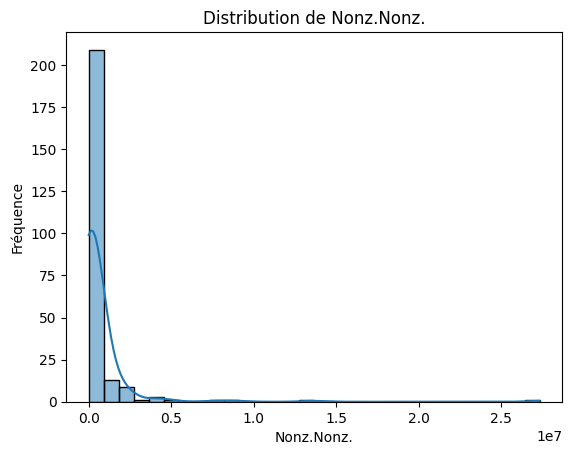

In [12]:
cols = ['VariablesVari.', 'ConstraintsCons.', 'Nonz.Nonz.']
for col in cols:
    plt.figure()
    sns.histplot(df[col], bins=30, kde=True)
    plt.title(f'Distribution de {col}')
    plt.xlabel(col)
    plt.ylabel('Fréquence')
    plt.show()

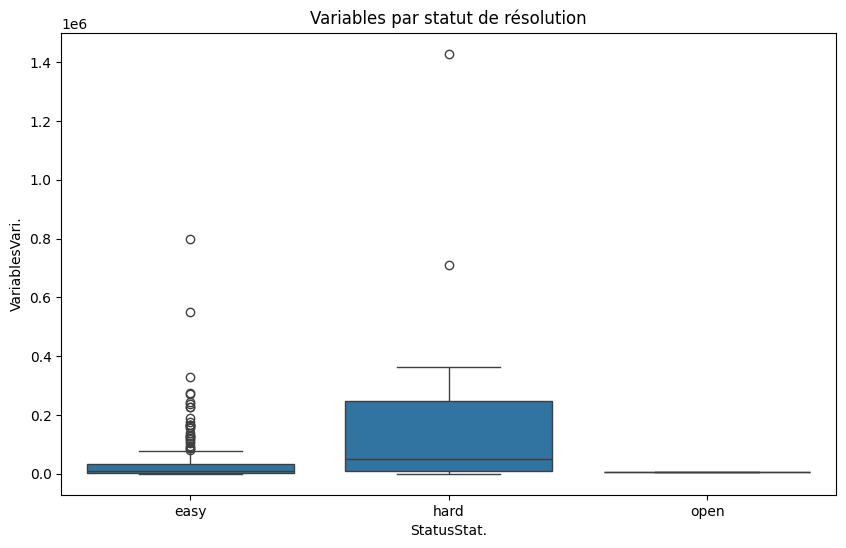

In [13]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x='StatusStat.', y='VariablesVari.')
plt.title('Variables par statut de résolution')
plt.show()

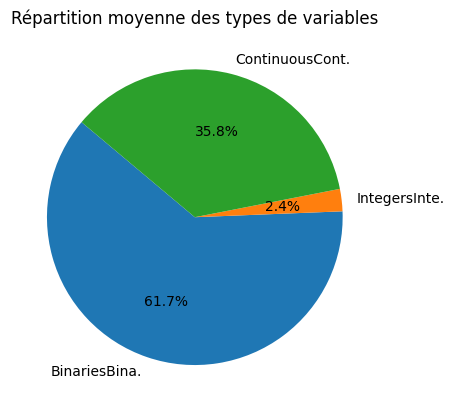

In [14]:
var_types = ['BinariesBina.', 'IntegersInte.', 'ContinuousCont.']
df[var_types].mean().plot(kind='pie', autopct='%1.1f%%', startangle=140)
plt.title('Répartition moyenne des types de variables')
plt.ylabel('')
plt.show()

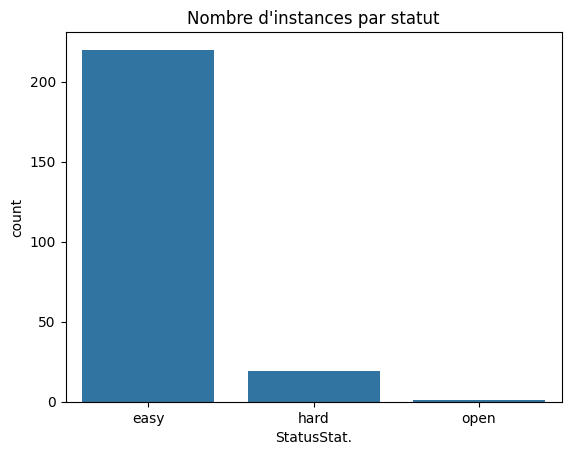

In [17]:
# Statistiques par statut
df.groupby('StatusStat.')[['VariablesVari.', 'ConstraintsCons.', 'Nonz.Nonz.']].mean()

# Nombre d’instances par statut
sns.countplot(data=df, x='StatusStat.')
plt.title("Nombre d'instances par statut")
plt.show()

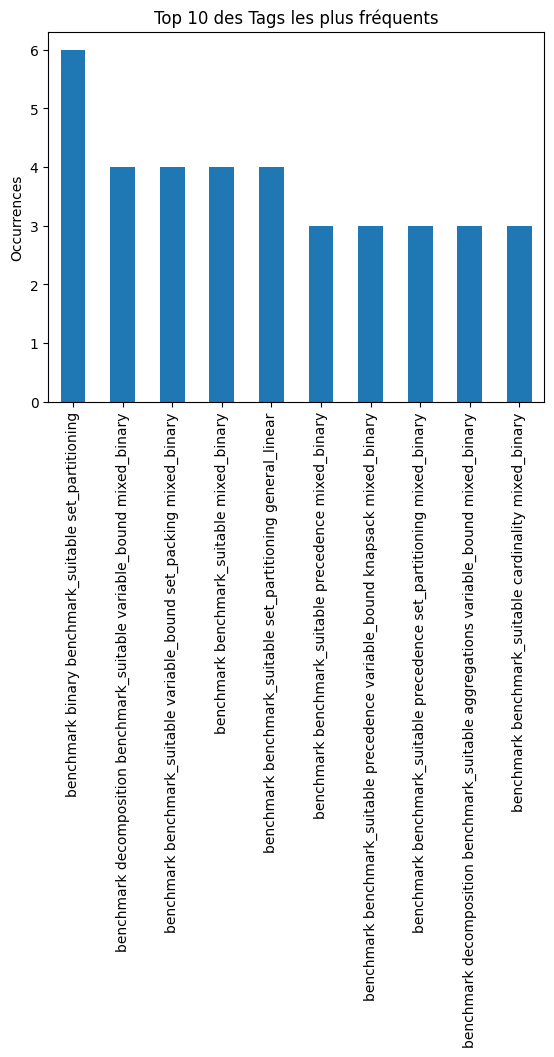

In [18]:
from collections import Counter

# Convertir tous les tags en liste
tags = df['TagsTags.'].dropna().str.split(',').sum()

# Compter la fréquence
tag_counts = Counter([tag.strip() for tag in tags])
tag_df = pd.DataFrame.from_dict(tag_counts, orient='index').sort_values(by=0, ascending=False)

# Afficher les 10 plus fréquents
tag_df.head(10).plot(kind='bar', legend=False)
plt.title("Top 10 des Tags les plus fréquents")
plt.ylabel("Occurrences")
plt.show()
